<a href="https://colab.research.google.com/github/kranthiswaroop19/oibsip_taskno3/blob/main/Car_price_prediction_using_machine_learningTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Car assignment usin machine learning predicition
#Multiple inputs and only 1 output

In [ ]:
!dataset - car price assignment

/bin/bash: line 1: dataset: command not found


In [ ]:
#1.take the data and create dataframe
import pandas as pd
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

In [ ]:
df.size

5330

In [ ]:
#to check the null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<ipython-input-11-0c7e310c0570>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

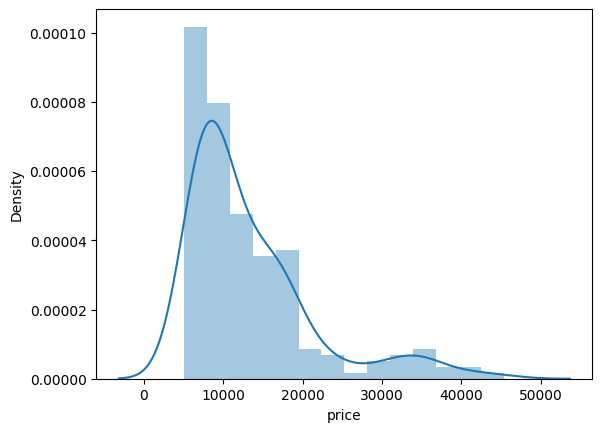

In [ ]:
#VISUALIZATION
import seaborn as sns
sns.distplot(df['price'])

In [ ]:
#Now we just want to consider only the numeric data/values
#So we create a dataframe with only numeric data
df_numeric = df.select_dtypes(include = ['float64','int64'])
df_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#Now we have to remove the column car_ID and symboling,because they are not of much use
df_numeric = df_numeric.drop(['symboling','car_ID'],axis = 1)#axis = 1 -column,axis = 0 -row
df_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [ ]:
#Divide the data into input and output
#Output - price,Input - rest of the 13 columns
#df.iloc[row slicing,column slicing]
x = df_numeric.iloc[:,0:13].values
x

array([[  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  94.5,  171.2,   65.5, ..., 5000. ,   19. ,   26. ],
       ...,
       [ 109.1,  188.8,   68.9, ..., 5500. ,   18. ,   23. ],
       [ 109.1,  188.8,   68.9, ..., 4800. ,   26. ,   27. ],
       [ 109.1,  188.8,   68.9, ..., 5400. ,   19. ,   25. ]])

In [ ]:
y = df_numeric.iloc[:,13].values
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [ ]:
#5.Train and Test variables - train_test_split()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [ ]:
print(x.shape)  -100%
print(x_train.shape) - 75%
print(x_test.shape) -25%

(205, 13)
(153, 13)
(52, 13)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(205,)
(153,)
(52,)


In [ ]:
#6.Normalization/Scaling(DONE ONLY FOR INPUT)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#7.run a classifier,REGRESSOR or clusterer
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#8.Fit the model(training the model)
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#9.predict the output
y_pred = model.predict(x_test) #using the input values,we predict the output
y_pred #PREDICTED OUTPUT VALUES

array([ 7228.83749589, 21490.68704221, 16843.92578075,  -408.88573459,
       12806.88877797, 14864.06930231,  6815.21828468,  7477.72764958,
       24370.76083649, 10122.57200019, 17227.20066046, 38255.87797552,
       11256.84858797, 15515.8531891 ,  6862.33962216, 14495.22658006,
       12908.29759634, 20089.7360149 , 12112.9445916 ,  7245.99470315,
       12180.32751173, 18941.52014488, 12446.19081036, 14964.92473417,
       22958.69376844,  8925.63443014,  7732.359849  , 18883.87938555,
        7815.43702522,  7137.47508384, 11136.70116598, 12703.41505146,
       22485.14049779,  8920.58002031,  7278.67268845, 28586.72492631,
       12234.13615858, 18290.11431538,  8085.5497993 , 38649.45073682,
        6761.48419029, 17525.36347714, 31858.57496193, 18698.70364197,
       12166.49554998,  8716.73070853,  8381.49914616, 17049.80445173,
       11020.16015803, 11326.88569464, 20247.44266236,  7818.27319638])

In [ ]:
y_test #ACTUAL OUTPUT VALUES

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ])

In [ ]:
print(x_train[10]) # these are normalized/scaled values

[0.28862974 0.48503937 0.07070707 0.525      0.280068   0.15625
 0.41964286 0.61437908 0.125      0.16190476 0.67346939 0.38888889
 0.44736842]


In [ ]:
#INDIVIDUAL PREDICTION
#model.predict([x])
model.predict([x_train[10]])

array([8070.06474751])

In [ ]:
x_train[100]

array([0.36443149, 0.66141732, 0.47474747, 0.69166667, 0.40161496,
       0.19921875, 0.76785714, 0.28104575, 0.144375  , 0.27619048,
       0.44897959, 0.22222222, 0.31578947])

In [ ]:
x_test[50]

array([0.63970588, 0.83902439, 0.925     , 0.67010309, 0.70959147,
       0.28806584, 0.42142857, 0.72677596, 0.08666667, 0.38333333,
       0.72222222, 0.09090909, 0.10810811])